# DataSet

Provided data appeared to be sales data for an electronic e-commerce store in the USA. Unfortunately, we do not have exact information about the store. For this project, our focus is to analyze the data and extract valuable insights.
Structure of the Dataset: There are 12 CSV files i.e. separate files for each month. Each CSV file has the same column names providing data in the same structured format. Columns are:

Order Id: Unique order id for each order placed

Product: Product ordered

Quantity ordered: quantity ordered in the placed ordered

Price Each: Unit Price of the product

Order date: Date and Time of order placed

Purchase Address: Delivery address for the order

# Outline

- First, we will start by reading each CSV file and concatenate these files to form a single data frame
- We will then spend time anaylising missing values and cleaning the dataset for further analysis
- We will also create and add additional columns in the dataset that help us in analyzing the data
- Once data frame is cleaned and modified, we will then jump to Exploratory data analysis and find out insights from the data

We will mainly focus on finding out:

1. What products are with the highest and the lowest price
2. Analysing quantity ordered for each product over the year
3. Sales performance over the year 2019
4. Top-grossing products of the store
5. Proportion of products in total sales
6. Top cities contributing to sales

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

## Importing DataSets

In the directory, we have a sales report CSV file for each month. We have to read each file and concatenate these files to form a single data frame. Upon observation, I have noticed that the name of these files follow the same format 'Sales_<Month>_2019.csv. Hence I have created a list for months and passed it through the for loop to read respective files and also concatenated each file to the previous data frame(each file has the same column names).

In [2]:
#creating list of months
months = ["January", "February", "March", "April","May",
          "June", "July","August","September", "October",
         "November", "December"]

#empty dataframe to which each csv file is concatenated after each loop
year_data = pd.DataFrame()

for month in months:
    #read csv files
    df = pd.read_csv("Sales_{}_2019.csv".format(month), parse_dates = ["Order Date"])
    #concatenate 
    year_data = pd.concat([year_data, df], ignore_index= True)
    

In [3]:
year_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [4]:
year_data.sample(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
14565,155117,Wired Headphones,1,11.99,02/20/19 10:49,"773 Washington St, San Francisco, CA 94016"
61682,200092,Apple Airpods Headphones,1,150,05/31/19 18:58,"398 Hill St, Dallas, TX 75001"
168645,302262,AAA Batteries (4-pack),1,2.99,12/06/19 19:37,"268 Center St, Atlanta, GA 30301"
143116,277879,iPhone,1,700,10/23/19 06:06,"402 Spruce St, San Francisco, CA 94016"
89745,226850,USB-C Charging Cable,1,11.95,07/27/19 08:21,"434 Washington St, Boston, MA 02215"


In [5]:
year_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

<AxesSubplot:>

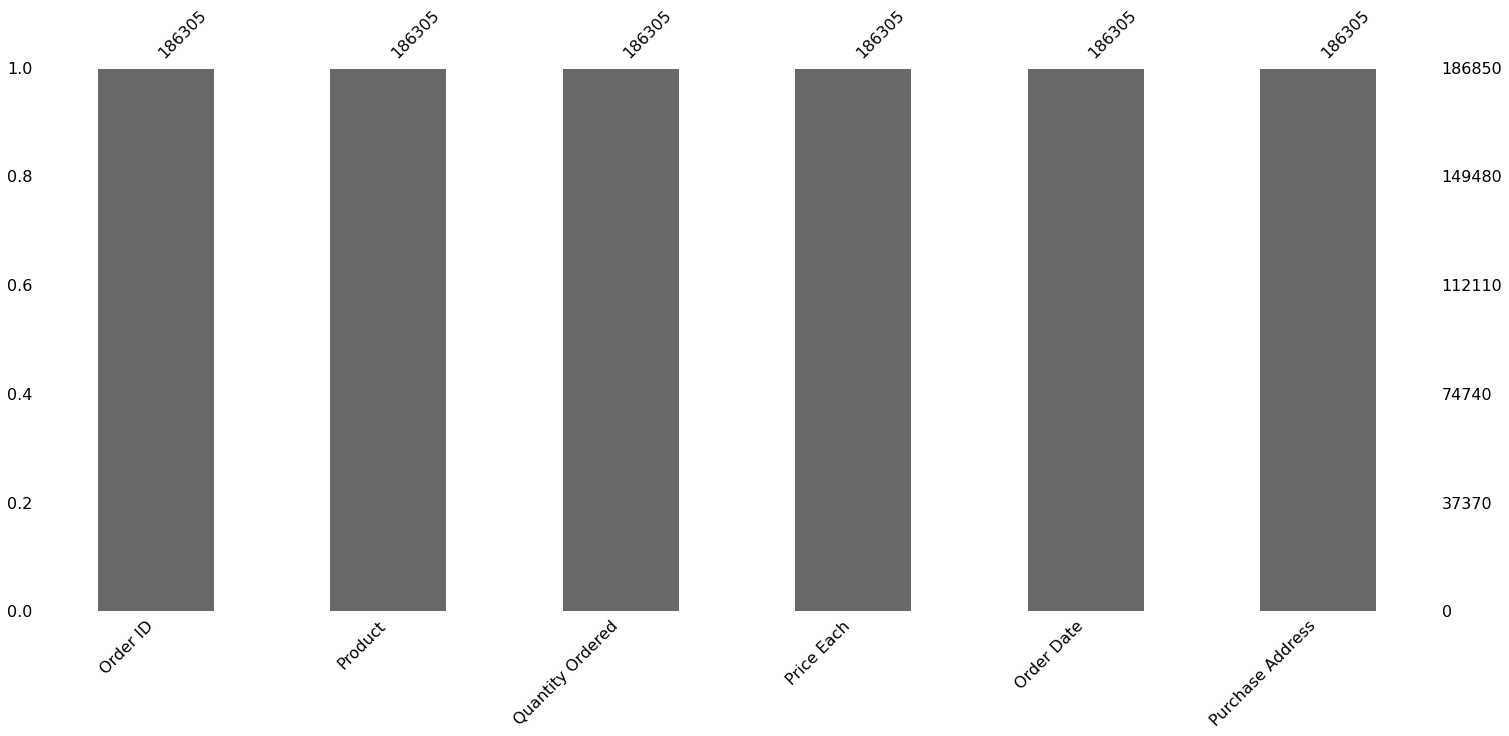

In [6]:
msno.bar(year_data)

<AxesSubplot:>

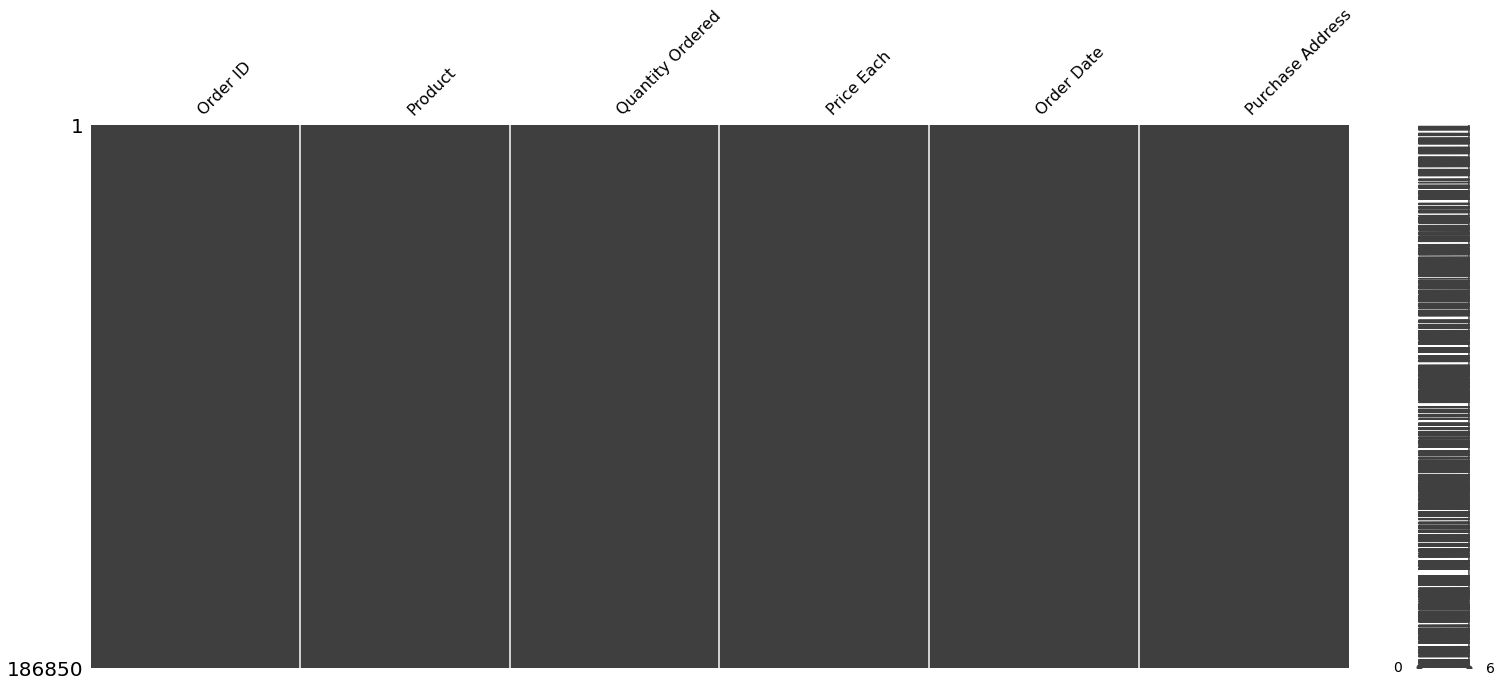

In [7]:
msno.matrix(year_data)

From the right side column, we can see that each column has 545 null values. It seems dataset has many rows with all null values.  We will drop these empty rows

In [8]:
year_data= year_data.dropna(how = "any")

In [9]:
#Validation for dropping missing value
year_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

All the empty rows are dropped. As we see, there are no null values in the dataframe

In [11]:
year_data.loc[64472]

Order ID                    Order ID
Product                      Product
Quantity Ordered    Quantity Ordered
Price Each                Price Each
Order Date                Order Date
Purchase Address    Purchase Address
Name: 64472, dtype: object

As we can see from index value 64472, column names are repetatively added in the dataset. We also need to drop these values

In [12]:
#getting index values for rows where the column names are added
invalid =year_data[year_data["Order ID"]=="Order ID"].index
invalid

Int64Index([  1073,   1102,   1194,   1897,   2463,   3115,   3247,   3612,
              3623,   4901,
            ...
            182719, 182881, 183282, 183787, 184108, 184931, 185070, 185481,
            185925, 185955],
           dtype='int64', length=355)

In [13]:
#dropping rows with indices for rows with column names
year_data = year_data.drop(index = invalid)

In [14]:
#Changing column names for convenience
year_data.columns =["order_id", "product", "ordered_qty", "unit_price","date", "address"]

In [15]:
#validating that rows with null values and column names are dropped
year_data

,order_id,product,ordered_qty,unit_price,date,address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


as from shape of new datfram, we can be sure that the intended rows are dropped

In [16]:
year_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   order_id     185950 non-null  object
 1   product      185950 non-null  object
 2   ordered_qty  185950 non-null  object
 3   unit_price   185950 non-null  object
 4   date         185950 non-null  object
 5   address      185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


As we can see from info, order quantity, unit price, date are all object data type. We will convert these to integer, float and datetime format respectively

In [17]:
#type casting
year_data[["order_id", "ordered_qty"]] = year_data[["order_id", "ordered_qty"]].astype(int)
year_data["unit_price"] = year_data["unit_price"].astype(float)
year_data["date"] = pd.to_datetime(year_data["date"])

lets also add columns for months, date and hour for furthur analysis

In [18]:
year_data["Month"] = year_data["date"].dt.month
year_data["Date"] = year_data["date"].dt.date
year_data["Hour"] = year_data["date"].dt.hour

We will also seperate and add column for City from address column to analyse sale for each city

In [19]:
#Extracting city and state from the address column
year_data["City"] = year_data["address"].apply(lambda x: x.split(",")[1]+ " " + x.split(",")[2].split(" ")[1])
year_data

,order_id,product,ordered_qty,unit_price,date,address,Month,Date,Hour,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,2019-01-22,21,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,2019-01-28,14,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,2019-01-17,13,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,2019-01-05,20,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,2019-01-25,11,Austin TX
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,2019-12-11,20,San Francisco CA
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,2019-12-01,12,Los Angeles CA
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,2019-12-09,6,Seattle WA
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,2019-12-03,10,Dallas TX


In [20]:
#sort dataset using date
year_data = year_data.sort_values("date")

# Exploratory Data Analysis

In [21]:
year_data[["ordered_qty","unit_price"]].describe()

,ordered_qty,unit_price
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


184.39973476701144


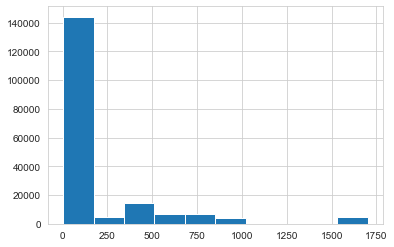

In [76]:
unit_price= year_data['unit_price']
unit_price.hist()
print(np.mean(unit_price))

- Average ordered quantity is 1 and maximum quantity ordered in a order is 9. Also average unit price of the store is 184 USD. However, the unit price distribution is highly left skewed as a result. Maximum unit price among products is 1700 USD.

## Products with Highest and Lowest unit Price

In [22]:
year_data[year_data["unit_price"] == year_data.unit_price.max()]["product"].unique()

array(['Macbook Pro Laptop'], dtype=object)

Macbook has hight price of 1700 USD among the product range

In [23]:
year_data[year_data["unit_price"] == year_data.unit_price.min()]["product"].unique()

array(['AAA Batteries (4-pack)'], dtype=object)

AAA batteries has minimum unit price of 2.99 USD 

## Analysing Quantity ordered for each product over the year

/var/folders/n0/s9fgc6f50t52rltt7_gdn9cm0000gn/T/ipykernel_1513/1536165158.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels= xaxis, rotation=89)


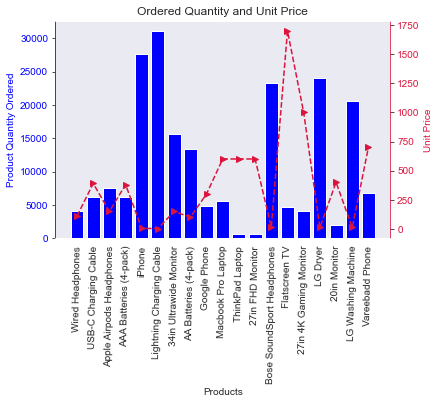

In [24]:
#creating labels for x axis
xaxis= year_data["product"].unique()

# creating series for sum of ordered quantity
products_qty_ordered = year_data.groupby("product")["ordered_qty"].sum()

#creating series for mean unit price
unit_price = year_data.groupby("product")["unit_price"].mean()

# setting plot style
sns.set_style('dark')
fig, ax1= plt.subplots()
ax1.bar(xaxis, products_qty_ordered, color= 'b', label='ordered_qty')
ax1.set_ylabel('Product Quantity Ordered', color='b')
ax1.tick_params(axis='y', labelcolor= 'b')
ax1.set_xticklabels(labels= xaxis, rotation=89)

#creating twin y axis as ax2
ax2 = ax1.twinx()

ax2.plot(xaxis, unit_price, c='crimson', linestyle='--', marker='>', label= 'unit_price')
ax2.set_ylabel('Unit Price', color='crimson')
ax2.tick_params(axis='y', labelcolor= 'crimson')

ax1.set_xlabel('Products')
plt.title('Ordered Quantity and Unit Price')

ax2.spines['left'].set_color('b')
ax2.spines['right'].set_color('crimson');


It can be observed that products with lower unit prices are ordered in more quantity than the products with higher unit prices

### Sales Performance over time

In [25]:
# calculating total sale and adding column to the dataframe
year_data["total_sale"] = year_data["ordered_qty"]* year_data["unit_price"]
year_data

,order_id,product,ordered_qty,unit_price,date,address,Month,Date,Hour,City,total_sale
6344,147268,Wired Headphones,1,11.99,2019-01-01 03:07:00,"9 Lake St, New York City, NY 10001",1,2019-01-01,3,New York City NY,11.99
7154,148041,USB-C Charging Cable,1,11.95,2019-01-01 03:40:00,"760 Church St, San Francisco, CA 94016",1,2019-01-01,3,San Francisco CA,11.95
8507,149343,Apple Airpods Headphones,1,150.00,2019-01-01 04:56:00,"735 5th St, New York City, NY 10001",1,2019-01-01,4,New York City NY,150.00
9161,149964,AAA Batteries (4-pack),1,2.99,2019-01-01 05:53:00,"75 Jackson St, Dallas, TX 75001",1,2019-01-01,5,Dallas TX,2.99
8514,149350,USB-C Charging Cable,2,11.95,2019-01-01 06:03:00,"943 2nd St, Atlanta, GA 30301",1,2019-01-01,6,Atlanta GA,23.90
...,...,...,...,...,...,...,...,...,...,...,...
170647,304165,AAA Batteries (4-pack),1,2.99,2020-01-01 04:13:00,"825 Adams St, Portland, OR 97035",1,2020-01-01,4,Portland OR,2.99
165366,299125,USB-C Charging Cable,1,11.95,2020-01-01 04:21:00,"754 Hickory St, New York City, NY 10001",1,2020-01-01,4,New York City NY,11.95
172400,305840,Bose SoundSport Headphones,1,99.99,2020-01-01 04:54:00,"784 River St, San Francisco, CA 94016",1,2020-01-01,4,San Francisco CA,99.99
166837,300519,Lightning Charging Cable,1,14.95,2020-01-01 05:13:00,"657 Spruce St, New York City, NY 10001",1,2020-01-01,5,New York City NY,14.95


Dataframe includes data for Jan 2020 as well, henceforth, we will just focus on analysing data for year 2019

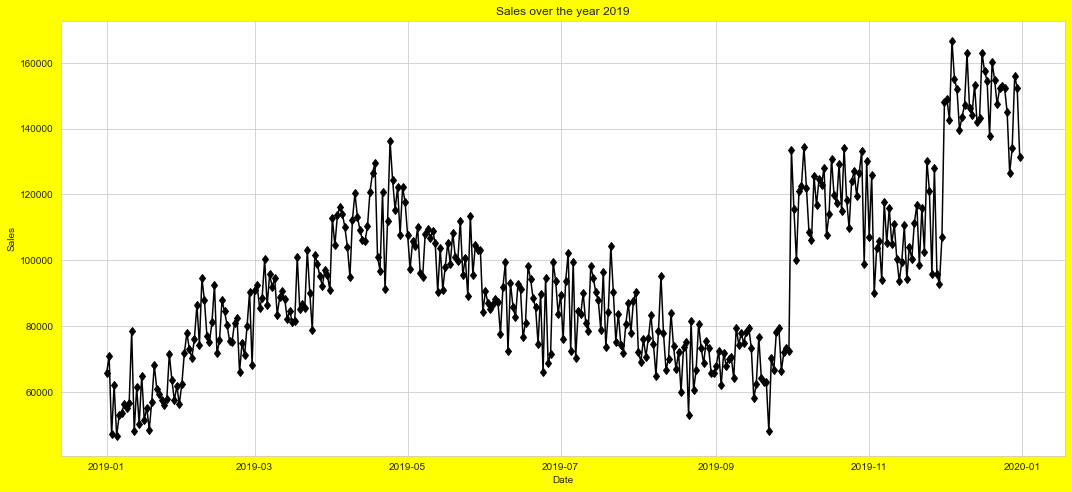

In [26]:
sales_2019 = year_data[(year_data["date"] > "2019-1-1")&(year_data["date"]< "2020-01-01")]

sales = sales_2019.groupby('Date')['total_sale'].sum()

plt.figure(figsize = (18,8), facecolor = "yellow")
sns.set_style("whitegrid")

sales.plot(marker='d', color='k')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales over the year 2019');

In [72]:
# Zoom in on sales between september to december as there seems to be a drastic change
sales_sep_dec = year_data[(year_data["date"] > "2019-9-15")&(year_data["date"]< "2020-01-01")]

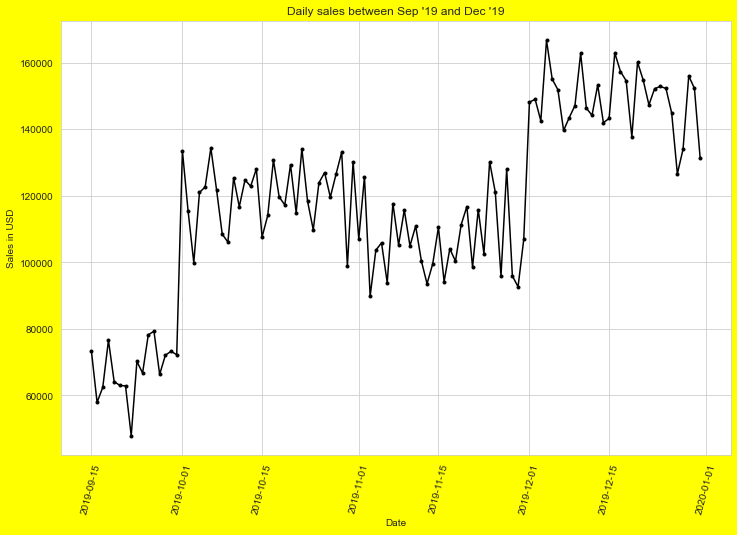

In [28]:
sales_sep_dec= sales_sep_dec.groupby("Date")["total_sale"].sum()

plt.figure(figsize = (12,8), facecolor = "yellow")
sns.set_style("whitegrid")

sales_sep_dec.plot(marker =".", color ="black")
plt.ylabel("Sales in USD")
plt.xticks(rotation=75)
plt.title("Daily sales between Sep '19 and Dec '19")
plt.show()

### Analysing sales for top 3 products

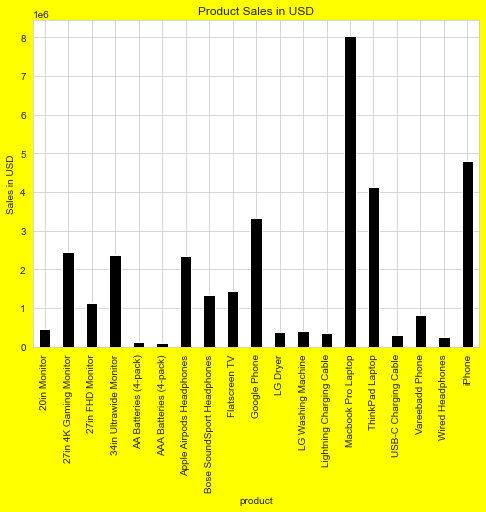

In [37]:
top_product = sales_2019.groupby('product')['total_sale'].sum()

plt.figure(figsize = (8,6), facecolor = "yellow")
sns.set_style("whitegrid")
top_product.plot(kind='bar', color= 'k')
plt.ylabel('Sales in USD')
plt.title('Product Sales in USD');

Top 3 products are MacBook, iPhone and Thinkpad Laptop

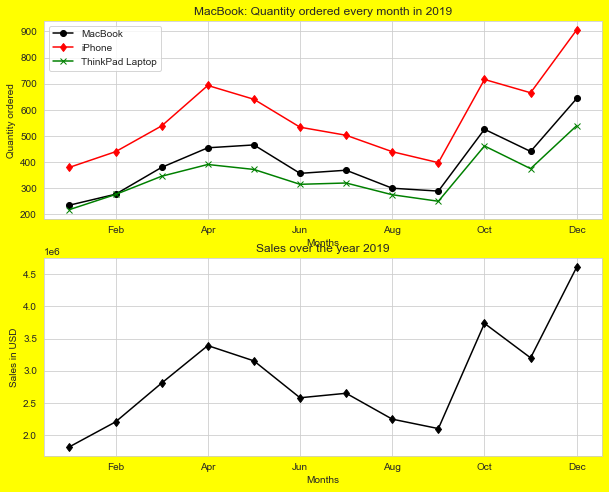

In [70]:
macbook_sales = sales_2019[sales_2019["product"]=="Macbook Pro Laptop"].groupby("Month")["ordered_qty"].sum()
iphone_sales = sales_2019[sales_2019["product"]=="iPhone"].groupby("Month")["ordered_qty"].sum()
TPLaptop_sales = sales_2019[sales_2019["product"]=="ThinkPad Laptop"].groupby("Month")["ordered_qty"].sum()
plt.figure(figsize = (10,8), facecolor = "yellow")

plt.subplot(2,1,1)
macbook_sales.plot(marker ="o", color = "black")
iphone_sales.plot(marker = "d", color="red")
TPLaptop_sales.plot(marker = "x", color="green")
plt.xlabel("Months")
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylabel("Quantity ordered")
plt.legend(["MacBook","iPhone","ThinkPad Laptop"])
plt.title("MacBook: Quantity ordered every month in 2019")

plt.subplot(2,1,2)
sales_months= sales_2019.groupby('Month')['total_sale'].sum()
sales_months.plot(marker='d', color='k')
plt.xlabel('Months')
plt.xticks([2,4,6,8,10,12],['Feb','Apr','Jun','Aug','Oct','Dec'])
plt.ylabel('Sales in USD')
plt.title('Sales over the year 2019');

We already know that MacBook, iPhone and Thinkpad laptop are the top products generating highest sales in year 2019. From the above plots, we can clearly see that sales of these 3 products significantly affect the sales performance of the store as both plots show the same pattern. As quantity ordered for these products increase, overall sales also increases significantly. We can see peaks around months April,October and December.

### Analysing proportion of sales by product

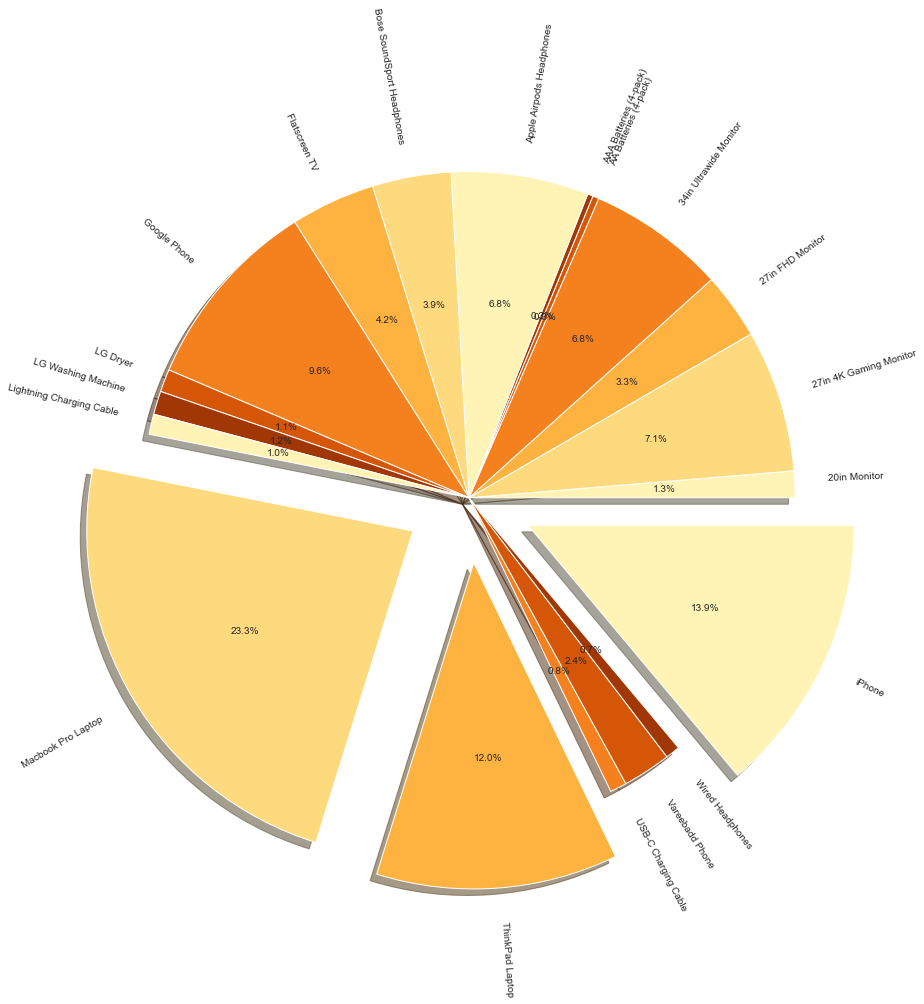

In [41]:
product = sales_2019.groupby("product")["total_sale"].sum().rename_axis("product").reset_index()
product_percent = product["total_sale"]/sum(product["total_sale"])*100
                         
plt.figure(figsize = (15,15))

plt.pie(product_percent, labels=product["product"],colors =sns.color_palette("YlOrBr"), 
        rotatelabels = 75, autopct ="%2.1f%%",
       explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.2,0.2,0,0,0,0.2], shadow=True)
plt.show()


Above pie chart represents the proportion of each product contributing to the sale. Sales of Macbook contributes 23.3%. iPhone stands at 2nd postion with contribution of 13.9% in sales. AAA batteries has the lowest proportion in the sale

## Analysing Sales as per City

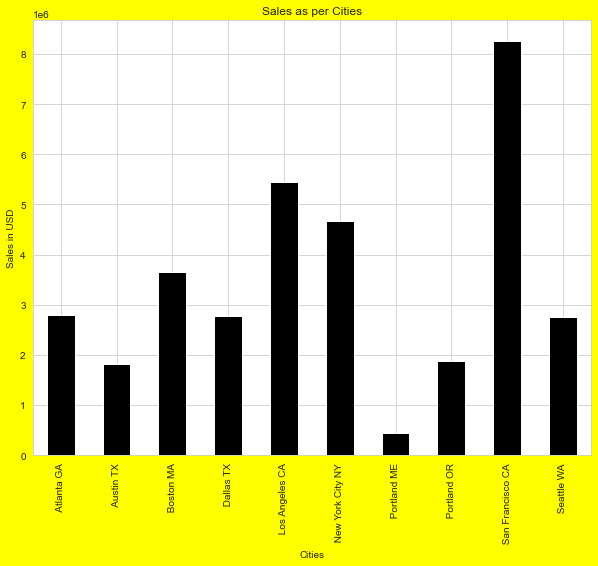

In [43]:
city_sales = sales_2019.groupby("City")["total_sale"].sum()

plt.figure(figsize=(10,8), facecolor = "yellow")

city_sales.plot(kind="bar", color = "black")
plt.xlabel("Cities")
plt.ylabel("Sales in USD")
plt.xticks(rotation="vertical")
plt.title("Sales as per Cities");

San Francisco contributes to highest sales for the store which is followed by Los Angeles and New York City. On the contrary, store made lowest sale in Portland ME

## Sale Traffic in Day

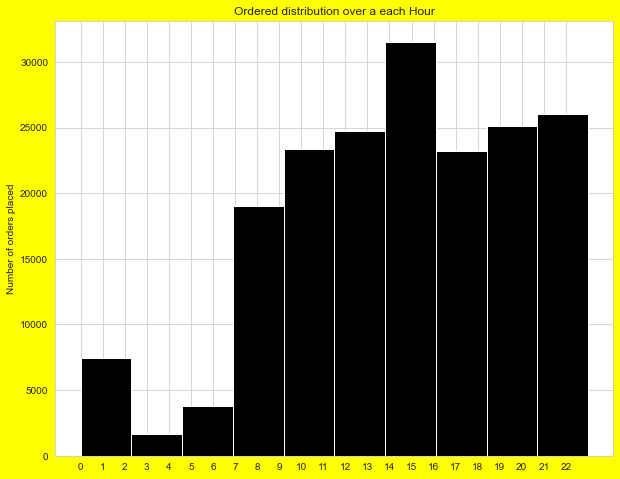

In [65]:
plt.figure(figsize=(10,8), facecolor = "yellow")
plt.hist(sales_2019['Hour'], color='k')
plt.ylabel('Number of orders placed')
plt.xticks(np.arange(0,23))
plt.title('Ordered distribution over a each Hour');

We can observe from the histogram that from 2 am to 7 am, the order traffic is silent. After 7 am, it increases significantly and keeps on rising till 3 pm. Afterward, it again decreases by around 17 percent till midnight

# Summary

From the analysis, we can conclude that

1. General tendency that appeared in the store's sales data is that products with lower unit prices are ordered more compared to those with higher unit prices. However, products with higher unit prices affect sales significantly.

2. Sales tend to increase in the 2nd quarter of 2019 and then decreasesd steadily till the end of the 3rd quarter. The store sees turbo boost in sales in the 4th quarter. Sales peak to the maximum in Christmas week.

3. MacBook, iPhone, and Thinkpad Laptops are the top-grossing products of the store

4. Consumers from San Francisco contribute the most in sales whereas, the store made the lowest sales in Portland ME

# Future Work

This project was mainly of a descriptive type. Future work can be focused on predicting future sales and providing inferences for marketing to attract more customers